#__AMAZON FOOD REVIEWS__
#SUPERVISED LEARNING

#__Imported Modules__

In [0]:
import numpy as np
import pandas as pd
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter 
import re 
import string
import nltk
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
from google.colab import drive
import io
import csv
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/Fine_food.csv', engine='python', error_bad_lines=False)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#__Data Exploration__

##*__Score Distribution__*
>How are the majority of reviews scored?








In [0]:
score_distribution = dataset['Score'].value_counts().sort_index(ascending=False) #Sort the scores in descending order
score_distribution

5    363122
4     80655
3     42640
2     29769
1     52268
Name: Score, dtype: int64

Text(0.5, 0, 'Amazon Score Ratings ')

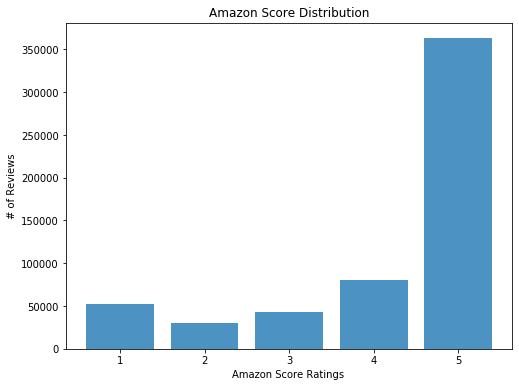

In [0]:
import matplotlib.pyplot as plt
'''
Plotting the Score Distribution of Amazon Reviews
'''

plt.figure(figsize=(8,6))
rating_ax= plt.bar(score_distribution.index, score_distribution.values, alpha=0.8) #Plot the distribution of scores
plt.title("Amazon Score Distribution")
plt.ylabel('# of Reviews', fontsize=10)
plt.xlabel('Amazon Score Ratings ', fontsize=10)

##*__Helpfulness Distribution__*
>Are the majority of reviews seen as helpful?



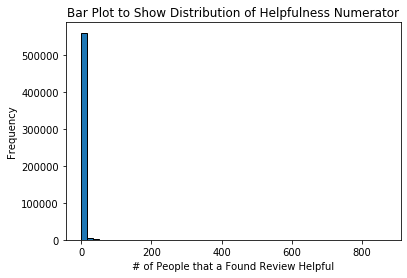

In [0]:
'''
Plotting the helpfulnessscore distributions using pd cut
to create 6 bins of equal length
'''
distrib = pd.cut(dataset['HelpfulnessNumerator'], bins=6).value_counts() #Cut the helpfulnessNumerator into 6 bins of equal length from eachother

plt.hist(dataset['HelpfulnessNumerator'], bins=50, edgecolor="k") #Plot the bins to show almost all reviews are found to be not useful
plt.xlabel('# of People that a Found Review Helpful', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Bar Plot to Show Distribution of Helpfulness Numerator')
plt.show() #Most reviews have a helpfulness close to zero

##*__Text Length Correlations (Length vs. Review)__*
>Is there a relationship between Length and Review Score?

In [0]:
def len_func(text_review):
  '''
  Paramaters: Text review
  ------------------
  Function to that finds the length where each word
  is a text feature seperated by a space
  '''
  return len(text_review.split(' '))

dataset['Length'] = dataset['Text'].apply(len_func) #Find the length of each text review (keep in mind the text has not been cleaned)
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


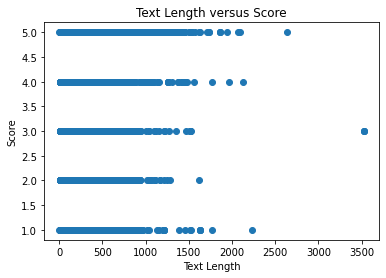

In [0]:
'''
scatter plot the text lengths per each score
to show that text length is NOT indicative
of review score
'''

plt.scatter(dataset['Length'], dataset['Score']) #Show a scatter plot of text length and rating giving (no correlation)
plt.title('Text Length versus Score')
plt.xlabel('Text Length')
plt.ylabel('Score')
plt.show()

##*__Text Length Correlations (Length vs. Helpfulness)__*
>Is there a relationship between Length and Helpfulness Score?

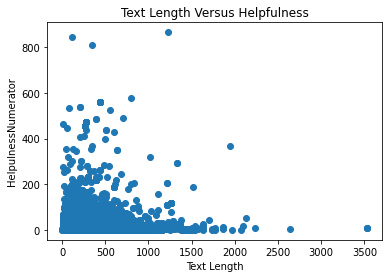

In [0]:
'''
Scatter plot helpfulness by text length to show that longer reviews
do not correlate to more helpful reviews
'''

helpfulness_dist=dataset.sort_values('HelpfulnessNumerator', ascending=False) #Sort dataset by the most helpful reviews
plt.scatter(helpfulness_dist['Length'], helpfulness_dist['HelpfulnessNumerator']) #Plot a scatterplot of text length versus helpfulness
plt.title('Text Length Versus Helpfulness')
plt.xlabel('Text Length')
plt.ylabel('HelpulnessNumerator')
plt.show()

##*__Cleaning the Text Column__*
>Due to dataset size, a random sample of 50000 rows was taken


In [0]:
'''
Take a sample of 50,000 rows
'''


#Can't take whole dataset, cleaning it would take way too long, over 550,000 rows
random_dataset = dataset.sample(n=50000, random_state=1) #Take 50,000 random samples, random_state seeds it to reproduce the same result
random_dataset = pd.DataFrame(random_dataset) #Make sure it is a dataframe
random_dataset.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessDenominator', 'Time', 'HelpfulnessNumerator', 'Length'], axis=1, inplace=True) #Drop column that we will not use
random_dataset.drop_duplicates(subset='Text', inplace=True) #Some text reviews repeat, which hurts our analysis
random_dataset.head()


,Score,Summary,Text
288312,5,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...
431726,5,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...
110311,5,great treat,my girls absolutely loved this tuna. they were...
91855,5,Daily Calming,The vendor is fast and dependable. The tea is ...
338855,5,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...


In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')


def remove_stopwords(sentence):
    '''
  Parameters: sentence field
  -------------------------
  Convert text to tokens
  Remove stopwords and keep words that only contain letters
  '''
    sentence = str(sentence).lower() #Places each sentence as a string
    tokens = word_tokenize(sentence) #Create tokens for each word in the sentence
    words = [word for word in tokens if word not in stop_words] #Keep a word if it is not a stopword
    words = [word for word in words if word.isalpha() and word not in 'br'] #Keep a word if it only contains letters, the br html tag repeats frequently
    return words

random_dataset['CleanedText'] = random_dataset['Text'].apply(remove_stopwords) #Clean the Text dataset
random_dataset['CleanedSummary'] = random_dataset['Summary'].apply(remove_stopwords) #Clean the Summary Dataset
random_dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Score,Summary,Text,CleanedText,CleanedSummary
288312,5,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,"[love, cherry, pie, lara, bar, best, tasty, ba...","[cherry, pie, larabar]"
431726,5,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,"[melitta, cafe, collection, blanc, et, noir, c...","[melitta, coffee]"
110311,5,great treat,my girls absolutely loved this tuna. they were...,"[girls, absolutely, loved, tuna, heaven, could...","[great, treat]"
91855,5,Daily Calming,The vendor is fast and dependable. The tea is ...,"[vendor, fast, dependable, tea, simply, best, ...","[daily, calming]"
338855,5,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,"[update, lot, happen, couple, months, last, tw...","[best, canned, artichokes]"


##*__Word Frequencies__*
>Create a function that takes word counts for each unique word

In [0]:
def word_counter(text_series):
  '''
  Parameters: Text Field
  ------------------
  Count the frequencies of certain words, keep in mind
  each word is being lowercased for consistency
  Then sort the frequencies
  '''
  word_frequency = {}
  for text in text_series: #For each text in the text series
      for word in text:  #For each word in each text
        if word.lower() in word_frequency: #Lowercase each word to make sure there are no repeats
            word_frequency[word.lower()] += 1 #Add to the frequency of that word
        else:
            word_frequency[word.lower()] = 1 #Create a new word in the dict
  
  freq_list = []
  for key, value in word_frequency.items(): #Append the key, value from the dict into a list of lists
      temp = [key,value]
      freq_list.append(temp)
  
  def takeSecond(elem):
    return elem[1]
  
  freq_list.sort(key=takeSecond, reverse=True) #Sort the list of lists of words and their freq by descending freq
  return freq_list

###__*Text Review Word Frequencies*__

Text(0, 0.5, 'Frequency')

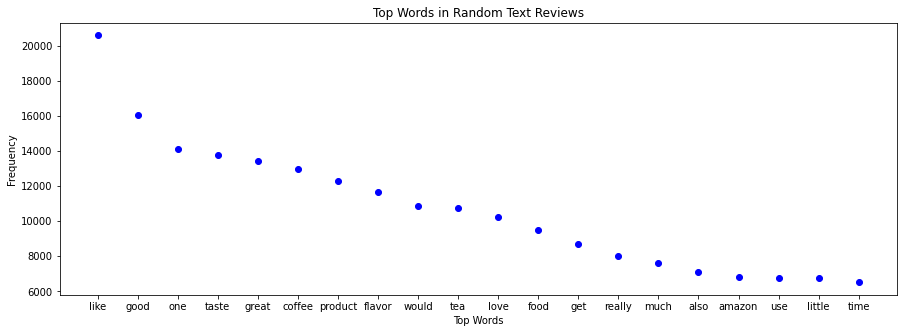

In [0]:
'''
Take the top 20 words that appear in the amazon reviews Text column - which we have
as "CleanedText"
and plot their frequency
'''


top_words = word_counter(random_dataset['CleanedText'])[:20]

words = [top_words[i][0] for i in range(len(top_words))]
freq = [top_words[i][1] for i in range(len(top_words))]
plt.figure(figsize=(15,5))
plt.plot(words,
         
         freq, 'bo')
plt.title('Top Words in Random Text Reviews')
plt.xlabel('Top Words')
plt.ylabel('Frequency')

###__*Summary Review Word Frequencies*__

Text(0, 0.5, 'Frequency')

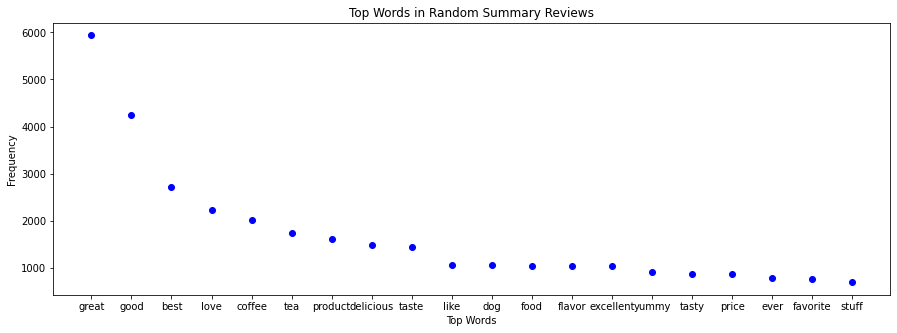

In [0]:
'''
Take the top 20 words that appear in the amazon reviews Summary column - which we have
as "CleanedSUmmary"
and plot their frequency
'''


top_words = word_counter(random_dataset['CleanedSummary'])[:20]

words = [top_words[i][0] for i in range(len(top_words))]
freq = [top_words[i][1] for i in range(len(top_words))]
plt.figure(figsize=(15,5))
plt.plot(words, freq, 'bo')
plt.title('Top Words in Random Summary Reviews')
plt.xlabel('Top Words')
plt.ylabel('Frequency')

#__Predictive Analysis__


##___Creating a Binary Rating Column___
>Assigning a positive or negative rating for logistic regression

In [0]:
def score_preprocess(score):  #Create a column where it is either positive or negative - use this for predictive modeling (prob should be 0 or 1 (binary))
    '''
    Parameter: Score Rating
    ------------------
    Return whether a rating is postive or negative
    '''
    if score > 3:
        return 'positive'  #If the score is 4 or 5 - it is positive
    else:
      return 'negative' #If the score is 1, 2, 3 - it is negative

random_dataset['Rating'] = random_dataset['Score'].apply(score_preprocess) #Apply the score_preprocess function to the 'Score' column
random_dataset.drop(columns=['Summary', 'Text'], axis=1, inplace=True) #Drop unnecessary columns, make sure inplace is True so the change is true
random_dataset.head()

,Score,CleanedText,CleanedSummary,Rating
288312,5,"[love, cherry, pie, lara, bar, best, tasty, ba...","[cherry, pie, larabar]",positive
431726,5,"[melitta, cafe, collection, blanc, et, noir, c...","[melitta, coffee]",positive
110311,5,"[girls, absolutely, loved, tuna, heaven, could...","[great, treat]",positive
91855,5,"[vendor, fast, dependable, tea, simply, best, ...","[daily, calming]",positive
338855,5,"[update, lot, happen, couple, months, last, tw...","[best, canned, artichokes]",positive


##___Partitioning the Data___
>Splitting the dataset into a training set and testing set

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(random_dataset, test_size=0.2) #Split dataset into 80% training, 20% test
print('There are {:d} items in the training set and {:d} in the testing set'.format(len(train), len(test)))

There are 37025 items in the training set and 9257 in the testing set


##___Creating the Dependent Variable___
>Our Dependent Varaible Will Be The Product's Rating



In [0]:
train_y = train["Rating"] #The y value for the train set is the rating column
test_y = test["Rating"] #The y value for the test set is the rating column

##___Preparing the Text Data for the CountVectorizer___
>Converting text reviews to list of strings so CountVectorizer can be used with data

- Each text review must be converted into a list of strings for the CountVectorizer to be applied
- Capitlization can be ignored for now

In [29]:
def series_to_string(text_series):
  '''
  Parameters: text review series
  ------------------------------
  Convert each review into a list of strings to later apply
  the CountVectorizer
  '''
  sentence = [] #Empty list to append strings to
  for row in text_series:
    together = '' #Empty string to start off with
    for word in row:
      together += ' ' + word #Add a space in between each word
    sentence.append(together.lstrip()) #Use lstrip to remove the lead whitespace in front of the string
  return sentence

#APPLY TO THE TRAINING DATA
train_x = series_to_string(train['CleanedText']) #Apply the function to the cleanedtext series
train_x[:5]

['initially fan starbucks via iced coffee convenient tasty affordable alternative iced coffee however taking product home shocked discover much sugar contains first thing notice emptying packet cup huge amount white granules staring back via packet contains sugar coffee equivalent six packets sugar starbucks says via two servings meaning sugar likely whole thing water one sitting empty calories adding cream pros quick cons much sugar slightly needs improvement starbucks needs either cut sugar content half make light version using splenda stevia sweetener',
 'first recieved product promptly enjoyed every cup drank far',
 'bars best health bars ever eaten moist sweet previous favorite kind almond apricot think could outdone wrong mango macadamia slight forerunner find craving bars time kind company outdone bars yummy good could better',
 'fruit ropes innovative delicious even though marketed child product truly great kids ages enjoy much grandchildren especially licorice lover twists mak

In [0]:
#APPLY series_to_string function to the test data
test_x = series_to_string(test['CleanedText']) #Apply function created above to the test data
test_x[:5]

['coffee connoisseur enjoy found gevalia dark chocolate truffle ground coffee nice blend especially smell brewing um brew quite nice hints flavor flavor coffee though strong dark chocolate smell pleasant change regular coffee',
 'favorite chocolate milk powder since kid version tastes good sugar definitely good way save teeth especially drink whole gallon milk maybe hot day nesquik remember buying bunny shaped bins years ago wish still least sure areas bins even bunny shaped recycle friendly give one two kids put crayons blue bin another plus',
 'aroma hartz smoked pork bone downright tempting taste buds humans extent reasons like product splinters badly lb dalmatian ate one last night today vomited shards bone lot everything else ate could pass result bone fragments blocking passageway intestines please purchase bones dog care enough find something else',
 'good coffee style gave try reviews would give stars aroma',
 'let first say avid green tea drinker go anywhere tea bags day alway

##___Implementing the Count Vectorizer___
>The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words


What to Know:
- An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() #Instantiate the count vectorizer, use to numerically represent words
vector = vectorizer.fit_transform(train_x) #To create a vector, we can do so by passing the text into the vectorizer to get back counts

##___Vocabulary Dictionary___
>Dictionary of review words with indexes 

- We can see that all words were made lowercase by default and that the punctuation was ignored.

In [34]:
import itertools
'''
Quckly showing the inside work of the vectorizer
'''

#Shows a word and its index - its numerical identifier
x = itertools.islice(vectorizer.vocabulary_.items(), 0, 5)

for key, value in x:
    print(key, value)

initially 15437
fan 10911
starbucks 28974
via 32979
iced 14856


##___Vector Array of Word Count___
>Encoded vector showing count of occurence in array form

- Since the vocabulary is so large, most counts return zero

In [0]:
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##___Word Count Dataframe___
>An easier way to see the above vector array

- Again, the vocabulary and amount of reviews are too large to see where certain words occur in each review

In [0]:
pd.DataFrame(data=vector.toarray()[:2], index=['Review 1', 'Review 2'],
             columns=vectorizer.get_feature_names()) #The data is the vector created

,aa,aaa,aaaa,aaah,aacute,aad,aafco,aah,aahing,aalmost,aamazon,aap,aargh,aarrgh,ab,aback,abalone,abandon,abandoned,abandoning,abates,abbazabba,abbie,abbott,abbreviated,abby,abc,abd,abdomen,abdominal,abel,aber,aberration,abetter,abhors,abide,abides,abietate,abilities,ability,...,zny,zodiac,zoe,zoey,zojirushi,zojurishi,zoka,zola,zombie,zombies,zomg,zone,zonkers,zoo,zoom,zoombies,zoomed,zoomies,zooming,zotz,zours,zout,zp,zsweet,zu,zucchini,zuchinni,zuchon,zufall,zuke,zukes,zuko,zum,zuma,zumba,zupas,zupreem,zwieback,zylitol,zylotol
Review 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Review 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#__Logistic Regression__


##___Applying Logistic Regression___

What to Know:
- Seeks to predict the probability that the output variable will fall into a category based on predictor variables
- Probability is then used to classify an observation
- Generally used when dependent variable is binary
  - Whether the dependent variable is 0 or 1
  - In our case the text is either negative (0) or positive (1)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

clf = LogisticRegression() #Have to initiate the formula
clf.fit(vector, train_y) #By fitting the data, coefficiants for the logistic regression equation are created

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##___Finding the Coefficient for Each Word___


- Below the _Sentiment_ column shows the coefficients for words in the logistic regression formula
- They were created _after_ fitting the logistic regression formula

In [0]:
#Make some sort of graph from these
words = vectorizer.get_feature_names() #Get each word name
word_sentiment = pd.DataFrame(data = list(zip(words, clf.coef_[0])), columns = ['Word', 'Sentiment'])
word_sentiment.sort_values(by='Sentiment')

,Word,Sentiment
34136,worst,-2.525609
32642,useless,-2.331302
8547,disappointing,-2.328762
30642,terrible,-2.231142
30923,threw,-2.097752
...,...,...
28363,soothing,1.741434
8021,department,1.782210
22820,pleased,1.884260
24899,refreshing,2.119515


Text(0, 0.5, 'Positive Sentiment')

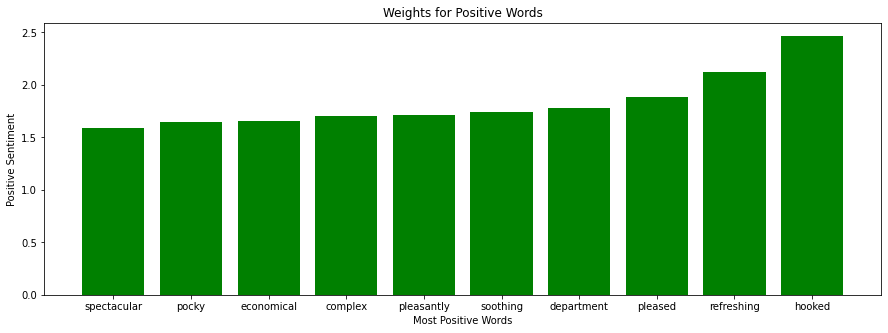

In [0]:
positive_words = word_sentiment.sort_values(by='Sentiment')[-10:] #Grab the top 10 most positive words
plt.figure(figsize=(15,5))
plt.bar(positive_words['Word'], positive_words['Sentiment'], color='g') #Plot word by its sentiment
plt.title('Weights for Positive Words')
plt.xlabel('Most Positive Words')
plt.ylabel('Positive Sentiment')

Text(0, 0.5, 'Negative Sentiment')

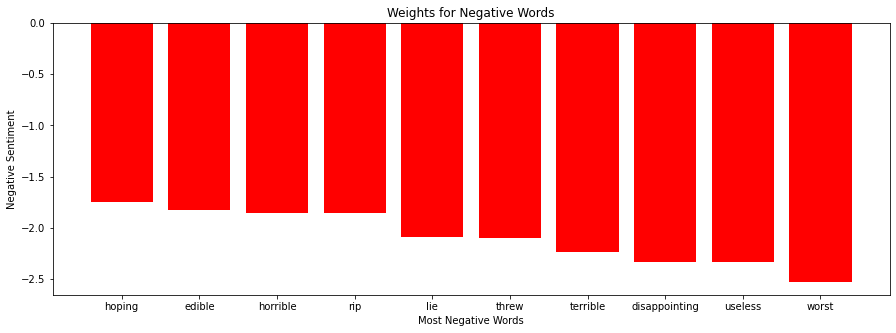

In [0]:
negative_words = word_sentiment.sort_values(by='Sentiment')[:10] #Grab top 10 most negative words

abs_sentiment = [abs(sentiment) for sentiment in negative_words['Sentiment']]#Need to take abosulte value of negative words to accuratley plot
abs_df = pd.DataFrame(data = list(zip(negative_words['Word'], abs_sentiment)), columns = ['Word', 'Abs Sentiment']) #Create a dataframe with the absoulute value
abs_df = abs_df.iloc[::-1] #Reverse dataframe so that the plot is in ascending order


plt.figure(figsize=(15,5))
plt.bar(abs_df['Word'], -abs_df['Abs Sentiment'], color='r')
plt.title('Weights for Negative Words')
plt.xlabel('Most Negative Words')
plt.ylabel('Negative Sentiment')

#__Accuracy Analysis__

- Using the logistic regression equation above and the test vector, we predict whether a review will be positive or negative
- We then compare the actual rating versus the predicted rating to get an accuracy score

In [0]:
vectors_test = vectorizer.transform(test_x) #Now we create the vector for the test set
prediction = clf.predict(vectors_test)
accuracy = metrics.accuracy_score(test_y, prediction)
print(str(accuracy * 100) + '%')

86.56152101112671%


##___Actual versus Predicted___



In [0]:
feature_coefs = pd.DataFrame(data = list(zip(test_y, prediction)), columns = ['Actual', 'Predicted'])
feature_coefs.head(10) #Shows first ten results of actual versus predicted

,Actual,Predicted
0,positive,positive
1,positive,positive
2,negative,negative
3,negative,positive
4,negative,negative
5,positive,positive
6,positive,positive
7,negative,negative
8,positive,positive
9,positive,positive


#__Confusion Matrix__

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, prediction)
print(cm) #Quickly shows the confusion matrix of the model

[[1182  758]
 [ 486 6831]]


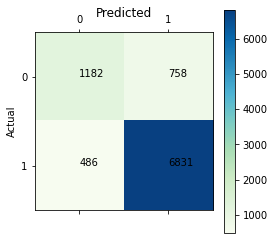

In [0]:
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
color = plt.cm.GnBu
plt.matshow(cm, cmap=color) #Use matplots heatmap
plt.colorbar() #Shows legend of intensity of color
plt.ylabel('Actual') #Actual 
plt.title('Predicted') #Xvalue for confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(cm[i][j])) #Plot the text of each value in confusion matrix to each box
plt.show()

- Remember, most reviews are positive, which is why there are so many True Positives (_bottom right corner_)